<a href="https://colab.research.google.com/github/ReyhaneTaj/Data-prepation/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (F) Some general comments on doing classification:

* In addition to the points we write in the outline, please consider the following points:
* Read the problem carefully; Understand what you are supposed to do. Sometimes, you are not supposed to classify from all the data, but you should only consider a subset of data which makes the task easier. (Just imagine you are allowed to remove some of the class 1 or 0)

* When doing hyperparameter tuning in step 8, you can consider randomized search and grid search. Try to focus on some special hyper parameter.

* Respecting the agile methodology, start from the simplest assumption and models, you will make them better later.

* In handling categorical variables, consider advantage and disadvantage of label encoding or one hot encoding. one hot encoding may leads to curse of dimensionality, and label encoding is not good all the time.

* Watch out data leakage all the time. You should ask yourself, which features do I have access to at the time of prediction. There might be some features that are highly correlated with your target but is not available at the time of prediction.

* When dealing with Nans, try to think about their meanings. They can be real missing values or they can have a meaning (for example they can be zero, or the fact that we don't have them, has a special meaning such as they don't exist, but not missing.)

* In general know about the meaning of over-fitting and under-fitting and in doing any ML task, consider it to avoid these two (especially overfitting).




# Titanic Survival Prediction

The aime is to build a ML algorithem to predict whether a person from the titanic disaster survived or not.

input: ID
Output: Surviving state.

## Outline:

1. **Applying Dummy Classifier**
2. **Data Exploration**
3. **Feature Selection**
4. **Handling Missing Values**
5. **Feature Engineering**
6. **Handling Categorical Features**
7. **Applying Three Different Methods**
9. **Fine-tuning the Models**
10. **Summary and Conclusion**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.**Applying Dummy Classifier**

A "dummy classifier" is a simple baseline classifier used in machine learning tasks for comparison with more sophisticated models.

Using a Dummy Classifier is particularly helpful when we have imbalanced classes or want to understand whether your model is learning meaningful patterns from the data beyond what might be learned by chance. It provides a point of reference for interpreting the performance of your actual model.

In [ ]:
## 1. Applying Dummy Classifier

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#First lets take a quick look at the data set information
df = pd.read_csv('train.csv')

# To Define X and y
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

#Split the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Apply dummy classifier
model = DummyClassifier(strategy = "most_frequent")
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)


accuracy = accuracy_score(y_prediction, y_test)



2. **Data Exploration**

Data exploration is an essential step in any data analysis process. It involves understanding the structure, content, and characteristics of the dataset to gain insights and inform subsequent analysis decisions.

The first step in data exploration is to gain an understanding of the content of each column in the dataset. This includes identifying the types of data present, exploring unique values, and understanding the distribution of values within each column.



In [ ]:
#Number of missing values of each collumn

missing_values_count = df.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


So there are 177 missing *values* in 'Age' column and its better to replace them with an average number.

In [ ]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Display unique values and their counts for desierd column

N_Pclass = df['Pclass'].value_counts()

print("\nUnique Values for 'Pclass' Columns:")
print(N_Pclass)


Unique Values for 'Pclass' Columns:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


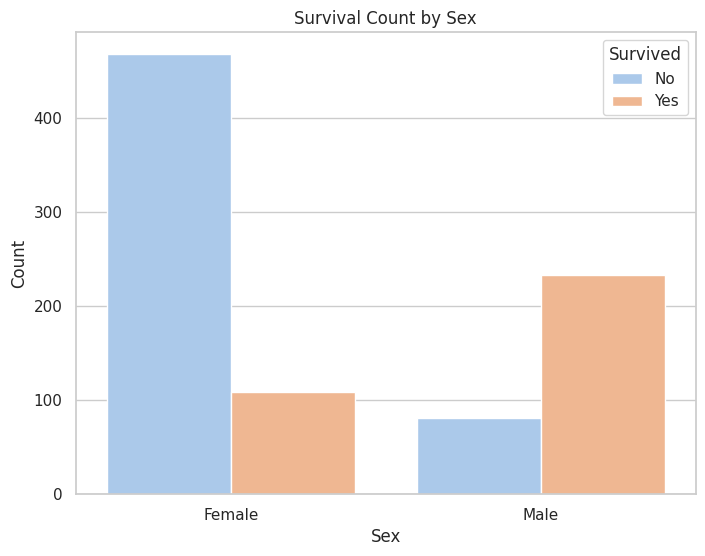

In [ ]:
# To visualize the relationship between 'Sex' and 'Survived' in the Titanic dataset, I create a bar plot or a count plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Set the labels for x-axis ticks
plt.legend(title='Survived', labels=['No', 'Yes'])  # Add legend with labels
plt.show()

**Visualising** the distribution of the target can be another step into better understanding of Data.

I plot a histogram and Pie plot of the 'Survived' column with two bins (0 and 1) representing the two classes.

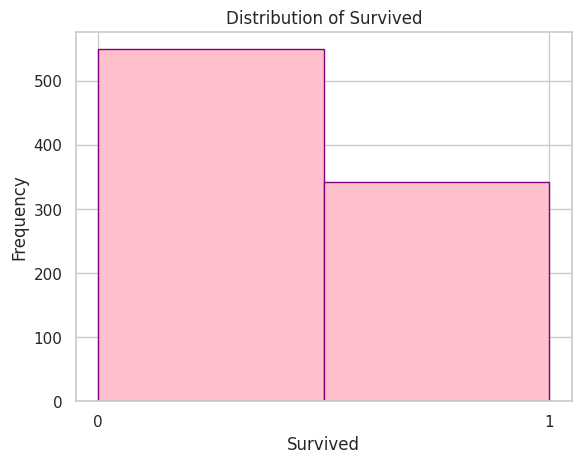

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' contains the target variable
y = df['Survived']

# Plot the distribution
plt.hist(y, bins=2, color='pink', edgecolor='purple')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Survived')
plt.xticks([0, 1])
plt.show()

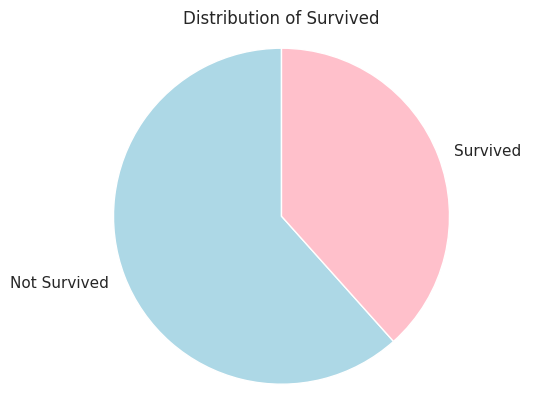

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' contains the target variable
y = df['Survived']

# Plot the distribution
plt.pie(y.value_counts(), labels=['Not Survived', 'Survived'], colors= ['lightblue', 'pink'], startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Survived')
plt.show()

3. **Feature Selection**

Feature selection is the process of selecting a subset of relevant features from the dataset to build a model.

Selecting the right features is crucial for building a robust and accurate machine learning model. By removing irrelevant or redundant features, we can simplify the model, reduce the risk of overfitting, and improve its interpretability. Additionally, feature selection can lead to faster training times and better generalization to unseen data.

Feature selection can be an iterative process, often occurring throughout various stages of the data analysis and model building pipeline. However, in the case of datasets with a well-defined target variable and a moderate number of features like the Titanic dataset, such iterative refinement may not always be necessary. Given the dataset's relatively small size and structured nature, simple feature selection techniques, such as examining feature importance from a single model or considering domain knowledge, may suffice to identify the most relevant features. For instance, in the Titanic dataset, which contains a manageable number of features and a clear target variable (survival), feature selection can typically be performed using methods such as examining feature importances from a Random Forest or other tree-based models, or by considering domain knowledge to select the most relevant features. However, it's always a good practice to evaluate your model's performance and assess the impact of different feature subsets on model accuracy. While an iterative feature selection process may not be required for this particular dataset, it's important to adapt your approach based on the characteristics of the data and the goals of your analysis.

Moreover, it's crucial to consider the relationship between the number of features and the model's complexity, especially when employing logistic regression. Logistic regression models assume a linear relationship between the features and the log-odds of the target variable. Therefore, as the number of features increases, the model's complexity may also increase, potentially leading to overfitting.

Very intuitivly I decided to keep some features like "PassengerId, SibSp, Age, Pclass, Sex, Fare, Parch" and to and I used the correlation matrix (corr()), which is one way to realize the importance of features. It helps to identify linear relationships between features and the target variable. However, it's essential to note that correlation doesn't capture nonlinear relationships and might miss important features that are correlated in a nonlinear manner with the target variable.

As the corr() gives the correlation between nummerical features and we have at least an important categorical featuer like'Sex', I must change it to numeric form in the main dataset.

In [ ]:
#Remove the unimportant features
df_N = df.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis = 1)

# To change the Categorical Features to Numerical.
label_encoder = LabelEncoder()
df_N['Sex'] = label_encoder.fit_transform(df_N['Sex'])

# Calculate the correlation matrix
correlation_matrix = df_N.corr()

# Print correlation of features with the target variable
print("Correlation with target variable (Survived):")
print(correlation_matrix['Survived'].sort_values(ascending=False))

Correlation with target variable (Survived):
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


<div class="alert alert-block alert-info">
<b>Title:</b> Applying Three Different Models on Titanic Dataset
</div>

<div class="alert alert-block alert-info">
<b>Description:</b>

This Colab notebook demonstrates the application of three different machine learning models—Logistic Regression, Decision Tree, and Random Forest—on the Titanic dataset to predict passenger survival. The Titanic dataset is a classic dataset used for machine learning and contains information about passengers' demographics and whether they survived the disaster.

<b>Key Steps:</b>
1. **Loading the Dataset:** The notebook loads the Titanic dataset from a CSV file using the Pandas library.
2. **Removing Unimportant Features:** It selects relevant features, including 'Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', and the target variable 'Survived', from the dataset.
3. **Handling Missing Values(Imputation):** The missing values in the 'Age' feature are imputed using the median value of the training data. Imputation helps to deal with missing values without discarding valuable data or introducing bias.
4. **Encoding Categorical Features:** The categorical feature 'Sex' is encoded into numeric form using label encoding to prepare it for modeling.
5. **Feature Engineering:** Two new features are created: 'FamSize', which represents the total family size by summing 'SibSp' and 'Parch', and 'Alon', which indicates whether the passenger is traveling alone or with family.
6. **Splitting the Data:** The dataset is split into training and testing sets using the train_test_split function from scikit-learn.
7. **Model Selection and Fitting:** Three different classifiers—Logistic Regression, Decision Tree, and Random Forest—are initialized and fitted to the training data.
8. **Model Evaluation:** Predictions are made using each model on the test set, and the accuracy of each model is calculated using the accuracy_score function from scikit-learn. The accuracy of each model is printed to the console.

**Dependencies:**
- Python 3.x
- NumPy
- Pandas
- scikit-learn


**Author:**
[Reyhaneh Taj]

**Date:**
[04.04.2024]
</div>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('train.csv')

# Remove the unimportant features
df = df[['Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']]

# Change the Categorical Features to Numeric form
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Create a new feature 'FamSize' by summing 'SibSp' and 'Parch'
df['FamSize'] = df['SibSp'] + df['Parch']

# Create 'Alon' feature indicating whether the passenger is alone or not
df['Alon'] = 0
df.loc[df['FamSize'] > 1, 'Alon'] = 1

# Remove the combined columns
df = df.drop(['SibSp', 'Parch'], axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace missing values for all features using SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Model selection and fitting
model_LR = LogisticRegression()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()

model_LR.fit(X_train_imputed, y_train)
model_DT.fit(X_train_imputed, y_train)
model_RF.fit(X_train_imputed, y_train)

# Model evaluation
y_prediction_LR = model_LR.predict(X_test_imputed)
y_prediction_DT = model_DT.predict(X_test_imputed)
y_prediction_RF = model_RF.predict(X_test_imputed)

accuracy_LR = accuracy_score(y_prediction_LR, y_test)
accuracy_DT = accuracy_score(y_prediction_DT, y_test)
accuracy_RF = accuracy_score(y_prediction_RF, y_test)

print("Accuracy of Logistic Regression:", accuracy_LR)
print("Accuracy of Decision Tree:", accuracy_DT)
print("Accuracy of Random Forest:", accuracy_RF)


Accuracy of Logistic Regression: 0.7988826815642458
Accuracy of Decision Tree: 0.7541899441340782
Accuracy of Random Forest: 0.8044692737430168


Now i want to do some Hyperparameter tuning for RandomForest model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best estimator
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
best_model_predictions = best_rf_model.predict(X_test)
best_model_accuracy = accuracy_score(best_model_predictions, y_test)
print("Accuracy of Best RandomForest:", best_model_accuracy)
